In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ghazaldanaei","key":"e82b6e374bd43c360d36a3c32fba4a28"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 7.57MB/s]


In [ ]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
train = pd.read_csv('/content/files/train.csv')
test = pd.read_csv('/content/files/test.csv')

In [ ]:
train 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


**preprocessing**

***filling records having 0 as screen width and internal memory with the mean of the the columns.***

In [ ]:
train[train['sc_w']==0] = train['sc_w'].mean()
train[train['int_memory']==0] = train['int_memory'].mean()

In [ ]:
pd.set_option('display.max_columns', None)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


**Removing outliers which are more than mean+3*std or less than mean-3*std.**

In [ ]:
from scipy import stats
import numpy as np
df = train[(np.abs(stats.zscore(train['battery_power']))< 3)]
df = df[(np.abs(stats.zscore(df[ 'clock_speed'])) < 3)]
df = df[(np.abs(stats.zscore(df[ 'fc']))          < 3)]
df = df[(np.abs(stats.zscore(df[ 'int_memory']))  < 3)]
df = df[(np.abs(stats.zscore(df[ 'm_dep']))       < 3)]
df = df[(np.abs(stats.zscore(df[ 'mobile_wt']))   < 3)]
df = df[(np.abs(stats.zscore(df[ 'n_cores']))     < 3)]
df = df[(np.abs(stats.zscore(df[ 'pc']))          < 3)]
df = df[(np.abs(stats.zscore(df[ 'px_height']))   < 3)]
df = df[(np.abs(stats.zscore(df[ 'px_width']))    < 3)]
df = df[(np.abs(stats.zscore(df[ 'ram']))         < 3)]
df = df[(np.abs(stats.zscore(df[ 'sc_h']))        < 3)]
df = df[(np.abs(stats.zscore(df[ 'sc_w']))        < 3)]
df = df[(np.abs(stats.zscore(df[ 'talk_time']))   < 3)]

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


**changing the class labels**

In [ ]:
df.loc[df['price_range'] <= 1.0, 'price_range_modified'] = 0.0
df.loc[df['price_range'] > 1.0, 'price_range_modified'] = 1.0
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_modified
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0,0.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0,1.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0,1.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0,1.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0,1.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0,1.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
df2 = df.drop("price_range", axis=1)

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df2 , df2['price_range_modified'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1261, 21), (541, 21))

In [ ]:
y_train = y_train.to_frame()
y_test =  y_test.to_frame()

In [ ]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range_modified'],
      dtype='object')

In [ ]:
def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
	# Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        auc_v = auc(current_variables + [v],target, basetable)
        
		# Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
            
    return best_variable, auc_v
    

candidate_variables = list(df2.columns.values)
candidate_variables.remove("price_range_modified")
current_variables = []
list1=list()
target = ["price_range_modified"]
max_number_variables = 15
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0, number_iterations):
    next_variable, auc_v = next_best(current_variables, candidate_variables, target, df2)
    current_variables = current_variables + [next_variable]
    list1 = list1 + [auc_v]
    candidate_variables.remove(next_variable)
print(current_variables)
print(list1)

['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'wifi', 'dual_sim', 'int_memory', 'touch_screen', 'blue', 'four_g', 'm_dep', 'three_g', 'clock_speed', 'sc_h']
[0.5026843173777212, 0.9750089928943815, 0.9875232829731249, 0.9970434319841528, 0.9996981836817156, 0.999884201086046, 0.9998398525658083, 0.9998041273689501, 0.9992448432526191, 0.9699132247287349, 0.9653859799544688, 0.9804472301885304, 0.9779784958952981, 0.968227980959702, 0.9681134139490879]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
logreg = linear_model.LogisticRegression()
logreg.fit(X_train[current_variables], y_train)
predictions = logreg.predict(X_test[current_variables])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[239  25]
 [ 31 246]]


**Task2**

In [ ]:
try:
    import sys
except ImportError:
    pass

In [ ]:
# step forward feature selection


import joblib
sys.modules['sklearn.externals.joblib'] = joblib


from  mlxtend.feature_selection import SequentialFeatureSelector as SFS
logreg = linear_model.LogisticRegression()
sfs1 = SFS(logreg, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2022-05-13 15:46:52] Features: 1/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2022-05-13 15:46:53] Features: 2/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.1s finished

[2022-05-13 15:46:54] Features: 3/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:  

In [ ]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17, 18, 20)

In [ ]:
list_of_chosen_feature = X_train.columns[list(sfs1.k_feature_idx_)]
list_of_chosen_feature = list(list_of_chosen_feature)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
logreg = linear_model.LogisticRegression()
logreg.fit(X_train[list_of_chosen_feature], y_train)
predictions = logreg.predict(X_test[list_of_chosen_feature])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[264   0]
 [  0 277]]


**Task3 and Task4**

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=15)
pca.fit(X_train)
X_train_modified= pca.transform(X_train)
X_test_modified= pca.transform(X_test)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train_modified, y_train)
predictions = logreg.predict(X_test_modified)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[262   2]
 [  6 271]]


**Task6 and Task7**

In [ ]:
print(min(X_train["battery_power"]))
print(max(X_train["battery_power"]))

501.0
1998.0


In [ ]:
#Creating bins and labels
bins = [501,875,1249,1623,1998]
labels = ['poor_battery_power','low_battery_power','medium_battery_power','high_battery_power']

X_train['battery_power_range'] = pd.cut(X_train['battery_power'],bins = bins, labels = labels)
X_test['battery_power_range'] = pd.cut(X_test['battery_power'],bins = bins, labels = labels)
X_train['battery_power_range']

1396      poor_battery_power
1457      poor_battery_power
595       poor_battery_power
1814      poor_battery_power
1304       low_battery_power
                ...         
925        low_battery_power
1344    medium_battery_power
1831      poor_battery_power
619       poor_battery_power
758     medium_battery_power
Name: battery_power_range, Length: 1261, dtype: category
Categories (4, object): ['poor_battery_power' < 'low_battery_power' < 'medium_battery_power' <
                         'high_battery_power']

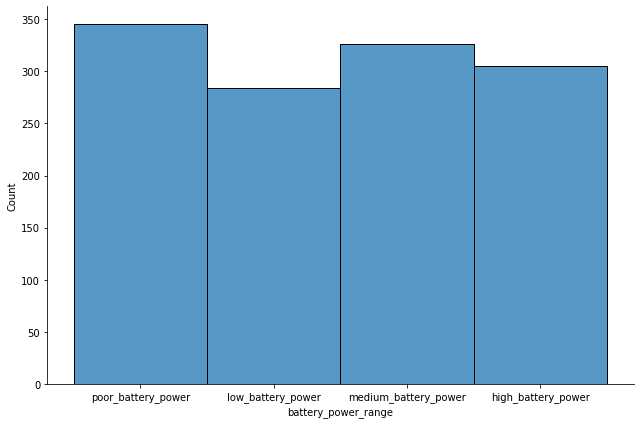

In [ ]:
import seaborn as sns
sns.displot(X_train, x="battery_power_range", height=6, aspect=1.5)

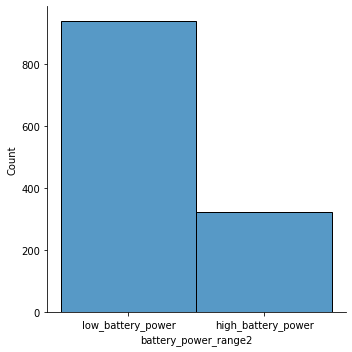

In [ ]:
#Creating bins and labels
bins = [501, 1600, 1998]
labels = ['low_battery_power','high_battery_power']

X_train['battery_power_range2'] = pd.cut(X_train['battery_power'],bins = bins, labels = labels)
X_test['battery_power_range2'] = pd.cut(X_test['battery_power'],bins = bins, labels = labels)
X_train['battery_power_range2']
sns.displot(X_train, x="battery_power_range2", height=5, aspect=1)

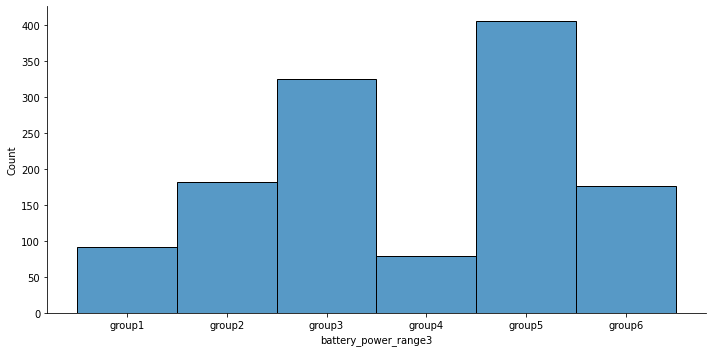

In [ ]:
#Creating bins and labels
bins = [501, 600, 800, 1200, 1300, 1800, 1998]
labels = ['group1','group2', 'group3', 'group4', 'group5', 'group6']

X_train['battery_power_range3'] = pd.cut(X_train['battery_power'],bins = bins, labels = labels)
X_test['battery_power_range3'] = pd.cut(X_test['battery_power'],bins = bins, labels = labels)
X_train['battery_power_range3']
sns.displot(X_train, x="battery_power_range3", height=5, aspect=2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
X_train_encoded = pd.get_dummies(X_train, columns = ['battery_power_range', 'battery_power_range2', 'battery_power_range3'])

In [ ]:
X_test_encoded = pd.get_dummies(X_test, columns = ['battery_power_range', 'battery_power_range2', 'battery_power_range3'])

**SVM model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_encoded, y_train)
y_pred = svclassifier.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[263   1]
 [  2 275]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       264
         1.0       1.00      0.99      0.99       277

    accuracy                           0.99       541
   macro avg       0.99      0.99      0.99       541
weighted avg       0.99      0.99      0.99       541



**Transformation**

In [ ]:
numerics=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [ ]:
X_train_encoded[X_train_encoded['fc']<=0]

In [ ]:
X_train_encoded[X_train_encoded['pc']<=0]

In [ ]:
X_train_encoded[X_train_encoded['px_height']<=0]

In [ ]:
X_test_encoded[X_test_encoded['fc']<=0]

In [ ]:
X_test_encoded[X_test_encoded['pc']<=0]

In [ ]:
numerics.remove('fc')
numerics.remove('pc')
numerics.remove('px_height')

In [ ]:
for c in [c for c in X_train_encoded.columns if c in numerics]:
    X_train_encoded[c] = np.log10(X_train_encoded[c])
    X_test_encoded[c] = np.log10(X_test_encoded[c])

**SVM MODEL**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_encoded, y_train)
y_pred = svclassifier.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[264   0]
 [225  52]]
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       264
         1.0       1.00      0.19      0.32       277

    accuracy                           0.58       541
   macro avg       0.77      0.59      0.51       541
weighted avg       0.78      0.58      0.50       541



**Adding a new feature**

In [ ]:
X_train_encoded['surface'] = X_train_encoded['sc_h']*X_train_encoded['sc_w']
X_train_encoded['volume'] = X_train_encoded['surface'] *X_train_encoded['m_dep'] 


In [ ]:
X_test_encoded['surface'] = X_test_encoded['sc_h']*X_test_encoded['sc_w']
X_test_encoded['volume'] = X_test_encoded['surface'] *X_test_encoded['m_dep'] 

In [ ]:
X_train_encoded['surface'] = np.log10(X_train_encoded['surface'])
X_train_encoded['volume'] = np.log10(X_train_encoded['volume'])
X_test_encoded['surface'] = np.log10(X_test_encoded['surface'])
X_test_encoded['volume'] = np.log10(X_test_encoded['volume'])

**SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_encoded, y_train)
y_pred = svclassifier.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[264   0]
 [224  53]]
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       264
         1.0       1.00      0.19      0.32       277

    accuracy                           0.59       541
   macro avg       0.77      0.60      0.51       541
weighted avg       0.78      0.59      0.51       541



**Prediction with SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_encoded, y_train)
y_pred = svclassifier.predict(X_test_encoded)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[263   1]
 [  2 275]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       264
         1.0       1.00      0.99      0.99       277

    accuracy                           0.99       541
   macro avg       0.99      0.99      0.99       541
weighted avg       0.99      0.99      0.99       541

